In [1]:
import yaml
import pandas as pd
from utils.data_preprocessor import DataPreprocessor

with open('../config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

training_file_path: str = "../data/AAPL_time_series.csv"

train_df = pd.read_csv(training_file_path)
validation_size: float = config["data"]["validation_size"]
lookback_period: int = config["data"]["lookback_period"]
target_column: str = config["data"]["target_column"]
trend_length: int = config["data"]["trend_length"]

training_processor = DataPreprocessor(train_df,lookback_period, target_column, validation_size, trend_length)

X = training_processor.X_batched
y = training_processor.y_batched

X_train = training_processor.X_train_scaled
y_train = training_processor.y_train_split
X_val = training_processor.X_validation_scaled
y_val = training_processor.y_validation_split

print("Training Dataset shape:", train_df.shape)
print("Dataset as time series batches:",X.shape, y.shape)
print("Training sets shape:", X_train.shape, y_train.shape)
print("Validation sets shape:", X_val.shape, y_val.shape)

Training Dataset shape: (5000, 30)
Dataset as time series batches: (4970, 20, 30) (4970,)
Training sets shape: (3976, 20, 30) (3976,)
Validation sets shape: (994, 20, 30) (994,)


In [2]:
from models.stock_trend_lstm_model import StockTrendLSTMModel

input_shape = (X_train.shape[1], X_train.shape[2])
my_model = StockTrendLSTMModel(input_shape)
history = my_model.train(X_train, y_train, X_val, y_val)

Epoch 1/50
497/497 [==============================] - 5s 6ms/step - loss: 0.7046 - accuracy: 0.5523 - val_loss: 0.6347 - val_accuracy: 0.7575
Epoch 2/50
497/497 [==============================] - 3s 5ms/step - loss: 0.6121 - accuracy: 0.6725 - val_loss: 0.5607 - val_accuracy: 0.7596
Epoch 3/50
497/497 [==============================] - 3s 5ms/step - loss: 0.5510 - accuracy: 0.7412 - val_loss: 0.5021 - val_accuracy: 0.8068
Epoch 4/50
497/497 [==============================] - 3s 5ms/step - loss: 0.4956 - accuracy: 0.7872 - val_loss: 0.4464 - val_accuracy: 0.8249
Epoch 5/50
497/497 [==============================] - 3s 5ms/step - loss: 0.4487 - accuracy: 0.8224 - val_loss: 0.3959 - val_accuracy: 0.8501
Epoch 6/50
497/497 [==============================] - 3s 5ms/step - loss: 0.4083 - accuracy: 0.8353 - val_loss: 0.3529 - val_accuracy: 0.8602
Epoch 7/50
497/497 [==============================] - 3s 5ms/step - loss: 0.3708 - accuracy: 0.8554 - val_loss: 0.3194 - val_accuracy: 0.8742
Epoch 

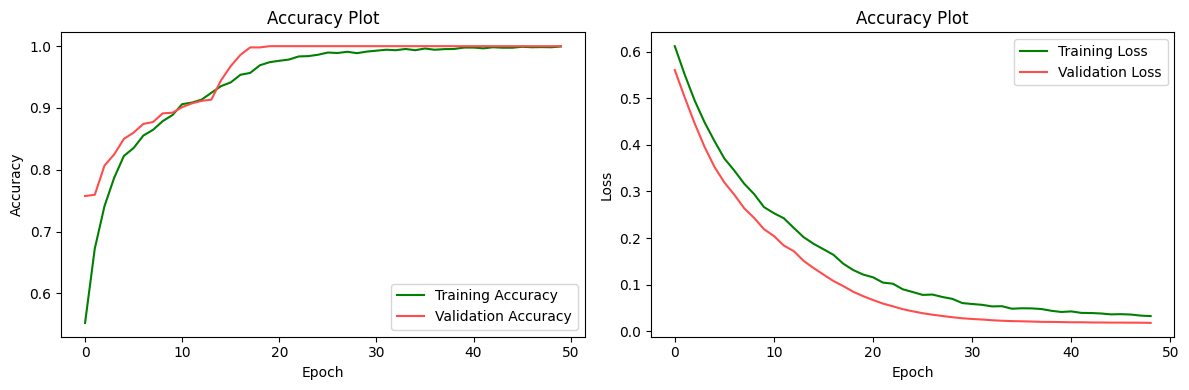

In [3]:
from utils.visualizing_service import plot_model_accuracy
plot_model_accuracy(history)